In [1]:
#Loading Data

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Input Data Files

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
        

In [2]:
data = pd.read_csv('BDOUY.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-12,18.980000,18.980000,17.879999,17.879999,17.421070,500
1,2020-10-13,18.400000,18.400000,18.400000,18.400000,17.927721,500
2,2020-10-14,17.030001,17.500000,17.020000,17.500000,17.050825,1700
3,2020-10-15,17.500000,17.500000,16.959999,16.959999,16.524683,1300
4,2020-10-16,18.850000,18.889999,17.780001,17.780001,17.323635,7500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       502 non-null    object 
 1   Open       502 non-null    float64
 2   High       502 non-null    float64
 3   Low        502 non-null    float64
 4   Close      502 non-null    float64
 5   Adj Close  502 non-null    float64
 6   Volume     502 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


In [5]:
#Splitting Data as Train and Validation

length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 502
Train data length : 351
Validation data lenth : 151


In [6]:
#Data Traing

train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2020-10-12,18.980000
1,2020-10-13,18.400000
2,2020-10-14,17.030001
3,2020-10-15,17.500000
4,2020-10-16,18.850000
...,...,...
346,2022-02-25,25.775000
347,2022-02-28,25.910000
348,2022-03-01,26.375000
349,2022-03-02,25.985001


In [7]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
351,2022-03-04,25.020000
352,2022-03-07,24.980000
353,2022-03-08,24.295000
354,2022-03-09,24.600000
355,2022-03-10,23.870001
...,...,...
497,2022-10-03,19.000000
498,2022-10-04,18.650000
499,2022-10-05,19.340000
500,2022-10-06,19.020000


In [8]:
#Creating Train Dataset from Train Split

dataset_train = train_data.Open.values
dataset_train.shape

(351,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (502,) to (502,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(351, 1)

In [10]:
#Normalization / Feature Scalling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(351, 1)

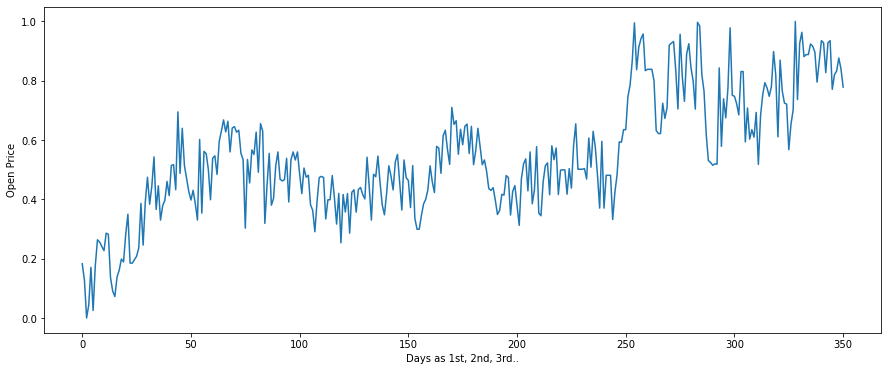

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
#Creating X_train and y_train from Train data

X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (301, 50)
Shape of y_train before reshape : (301,)


In [14]:
#Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (301, 50, 1)
Shape of y_train after reshape : (301, 1)


In [15]:
X_train[0]

array([[0.18292674],
       [0.12851773],
       [0.        ],
       [0.04408996],
       [0.17073161],
       [0.02532814],
       [0.17636013],
       [0.26360216],
       [0.25609747],
       [0.24108809],
       [0.22701689],
       [0.28611623],
       [0.28236398],
       [0.13602242],
       [0.09099428],
       [0.07223246],
       [0.13789859],
       [0.16135075],
       [0.19868668],
       [0.1890243 ],
       [0.28236398],
       [0.3499061 ],
       [0.18508433],
       [0.18480291],
       [0.19652899],
       [0.20825507],
       [0.23639756],
       [0.38649146],
       [0.24577852],
       [0.39118199],
       [0.47467158],
       [0.3836773 ],
       [0.44418368],
       [0.54315188],
       [0.36632251],
       [0.44559099],
       [0.33020619],
       [0.37898677],
       [0.39681041],
       [0.46060038],
       [0.41275788],
       [0.51463415],
       [0.51726079],
       [0.4324576 ],
       [0.69512195],
       [0.48780478],
       [0.63977477],
       [0.514

In [16]:
y_train[0]

array([0.3977485])

In [17]:
#Creating RNN Model

# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
10/10 [==============================] - 3s 16ms/step - loss: 0.7418 - accuracy: 0.0033
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 0.3858 - accuracy: 0.0033
Epoch 3/50
10/10 [==============================] - 0s 16ms/step - loss: 0.3443 - accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 16ms/step - loss: 0.3526 - accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 0.3248 - accuracy: 0.0033
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.2760 - accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 0s 16ms/step - loss: 0.2742 - accuracy: 0.0000e+00
Epoch 8/50
10/10 [==============================] - 0s 16ms/step - loss: 0.2683 - accuracy: 0.0033
Epoch 9/50
10/10 [==============================] - 0s 16ms/step - loss: 0.2298 - accuracy: 0.0000e+00
Epoch 10/50
10/10 [==============================] - 0s 16ms/step - loss: 0.2553 - accura

In [18]:
#Evaluating Model

#Losses

history.history["loss"]

[0.7418140172958374,
 0.3858279883861542,
 0.3442898988723755,
 0.35257986187934875,
 0.3247587978839874,
 0.2760264575481415,
 0.2742062509059906,
 0.2683417499065399,
 0.22975817322731018,
 0.2553451955318451,
 0.22148902714252472,
 0.2329738289117813,
 0.23362988233566284,
 0.2048296183347702,
 0.18155598640441895,
 0.17042869329452515,
 0.16745224595069885,
 0.15105636417865753,
 0.17674261331558228,
 0.1580769419670105,
 0.13509051501750946,
 0.1299179047346115,
 0.127818763256073,
 0.13273993134498596,
 0.10800901055335999,
 0.10347137600183487,
 0.09345264732837677,
 0.09034004807472229,
 0.09263768792152405,
 0.09778717160224915,
 0.09539736062288284,
 0.08181176334619522,
 0.09246281534433365,
 0.08022450655698776,
 0.08530668169260025,
 0.08056469261646271,
 0.07861192524433136,
 0.09204978495836258,
 0.07392363250255585,
 0.06557776033878326,
 0.06371867656707764,
 0.068449966609478,
 0.06134844943881035,
 0.06074444204568863,
 0.05854140967130661,
 0.06157753989100456,
 0.0

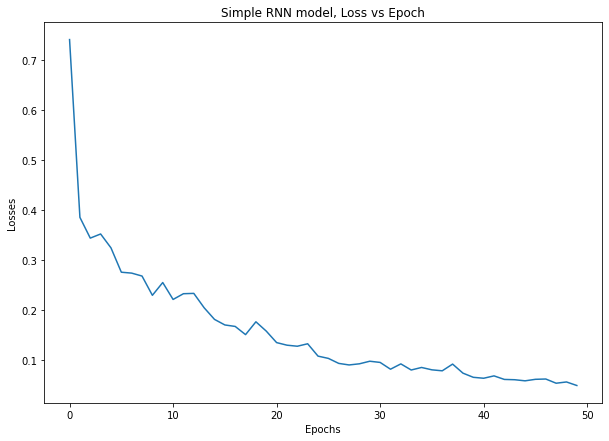

In [19]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

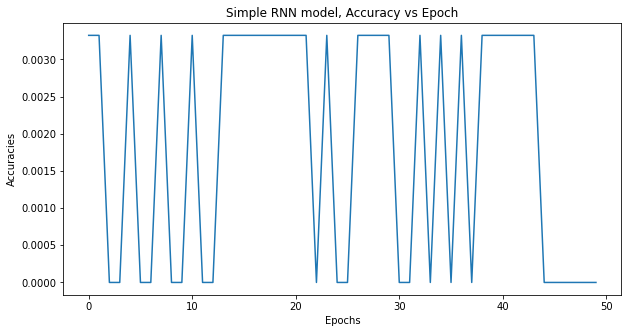

In [20]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [21]:
#Model Predction For Train Data

y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

10/10 [==============================] - 0s 5ms/step


(301, 1)

In [22]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(301, 1)

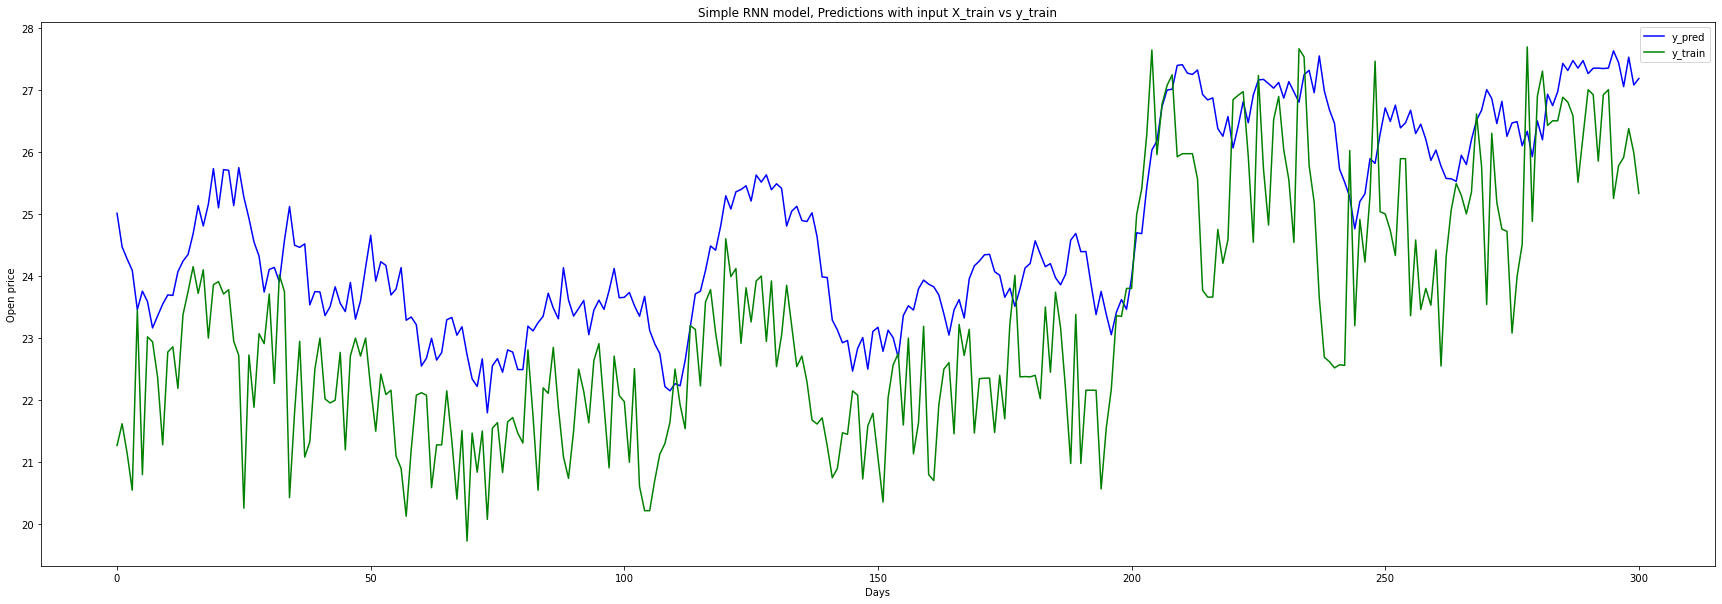

In [23]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [24]:
#Test Dataset Creation from Validation Data

#Converting array and scalling

dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (151, 1)


In [25]:
#Creating X_test and y_test

X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [26]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [27]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (101, 50)
Shape of y_test before reshape : (101,)


In [28]:
#Reshape

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [29]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (101, 50, 1)
Shape of y_test after reshape : (101, 1)


In [30]:
#Validation Data Evaluation

# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

4/4 [==============================] - 0s 5ms/step
Shape of y_pred_of_test : (101, 1)


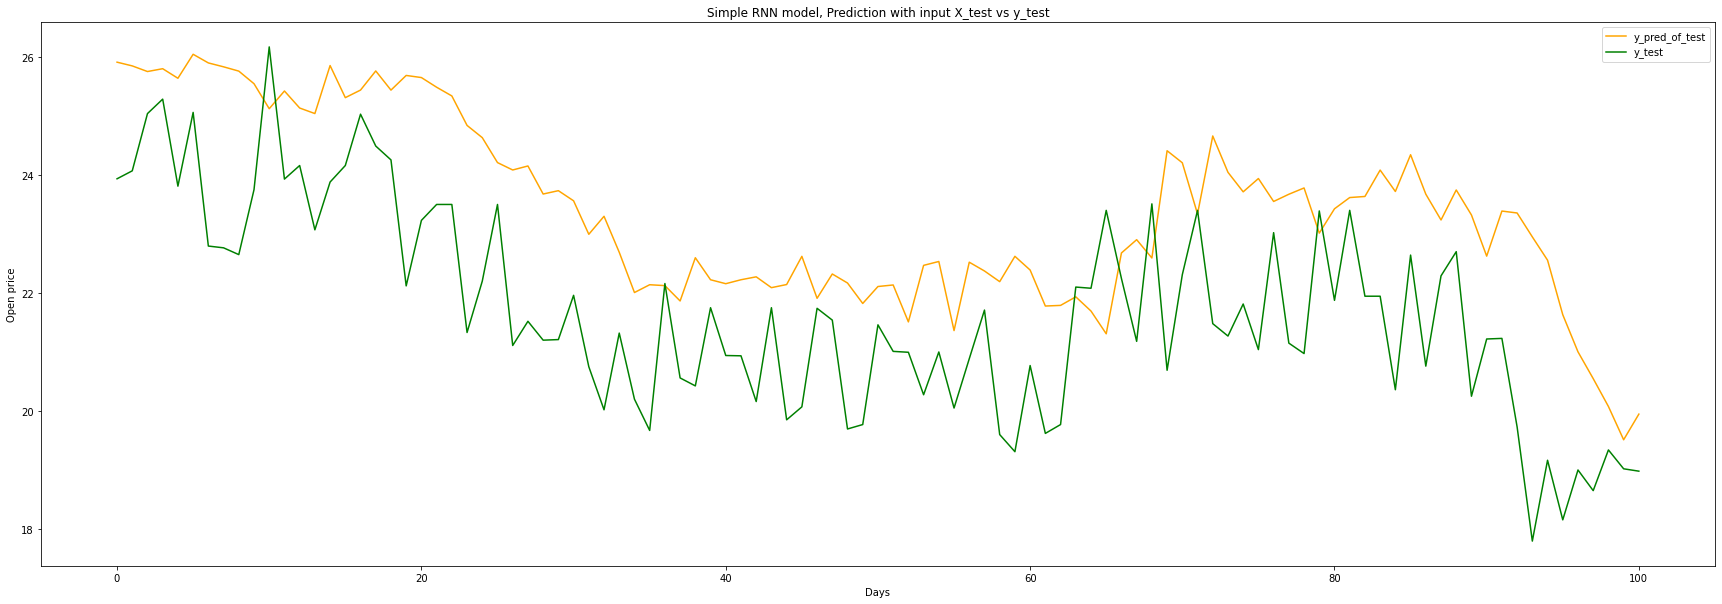

In [31]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

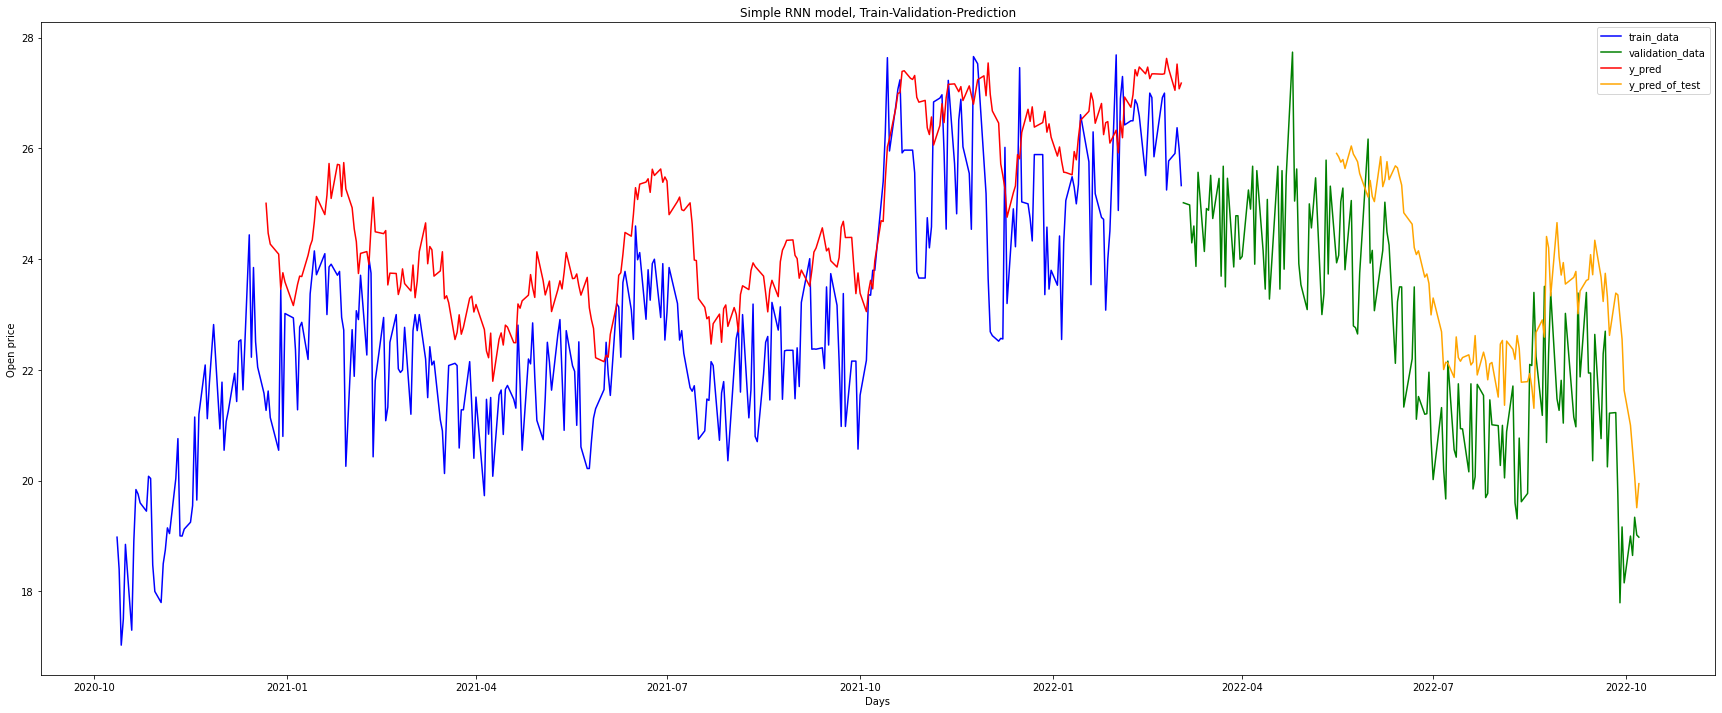

In [32]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [33]:
#Creating LSTM Model

y_train = scaler.fit_transform(y_train)

In [34]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
31/31 [==============================] - 4s 17ms/step - loss: 0.0522 - accuracy: 0.0066
Epoch 2/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0281 - accuracy: 0.0066
Epoch 3/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0256 - accuracy: 0.0066
Epoch 4/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0224 - accuracy: 0.0066
Epoch 5/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0244 - accuracy: 0.0066
Epoch 6/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0232 - accuracy: 0.0066
Epoch 7/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0219 - accuracy: 0.0066
Epoch 8/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0248 - accuracy: 0.0066
Epoch 9/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0251 - accuracy: 0.0066
Epoch 10/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0206 - accuracy: 0.0066


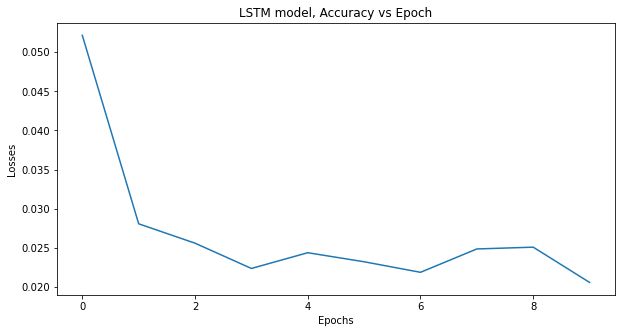

In [35]:
#Evaluating LSTM Model

plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

4/4 [==============================] - 1s 7ms/step


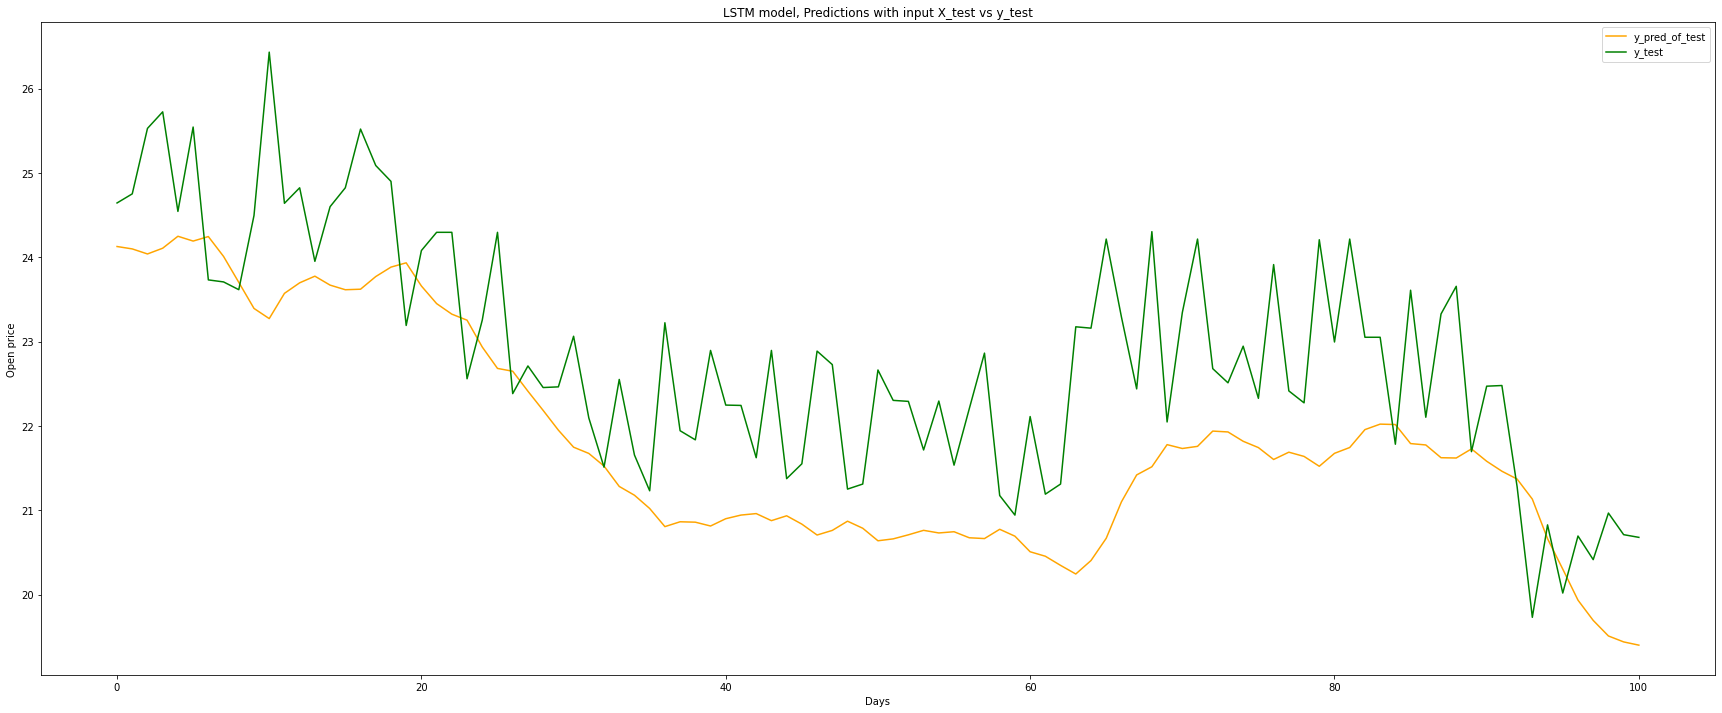

In [36]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [44]:
data.iloc[1]

Date         2020-10-13
Open               18.4
High               18.4
Low                18.4
Close              18.4
Adj Close     17.927721
Volume              500
Name: 1, dtype: object

In [38]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.56255468],
        [0.55993018],
        [0.43394576],
        [0.5608049 ],
        [0.3945755 ],
        [0.54068241],
        [0.6850392 ],
        [0.31583552],
        [0.26509169],
        [0.52055993],
        [0.31933526],
        [0.3455818 ],
        [0.75328084],
        [0.74978128],
        [0.98075241],
        [0.77865284],
        [0.59230096],
        [1.        ],
        [0.50656185],
        [0.79002607],
        [0.98075241],
        [0.6447944 ],
        [0.60804899],
        [0.70306212],
        [0.5678042 ],
        [0.9146105 ],
        [0.58705162],
        [0.55608049],
        [0.97900245],
        [0.71391076],
        [0.98075241],
        [0.72615923],
        [0.72615923],
        [0.44881907],
        [0.84811899],
        [0.51881015],
        [0.78652686],
        [0.85826789],
        [0.4295713 ],
        [0.59929991],
        [0.60104987],
        [0.33858268],
        [0.        ],
        [0.23972021],
        [0.0629923 ],
        [0

In [40]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for September 12, 2022      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for September 12, 2022 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 27ms/step
Simple RNN, Open price prediction for September 12, 2022      : 19.678457
LSTM prediction, Open price prediction for September 12, 2022 : 18.119656
